## DATA MINING PROJECT

In [14]:
# Installing dependencies
! pip install scikit-learn
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install seaborn


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Loading the dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 

In [16]:
# Lab 02 Activities
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity


df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
numerical_df = df[['Age', 'Fare', 'SibSp', 'Parch']]

manhattan_dist = manhattan_distances(numerical_df)
print("Manhattan Distance:\n", manhattan_dist)

euclidean_dist = euclidean_distances(numerical_df)
print("Euclidean Distance:\n", euclidean_dist)

cosine_sim = cosine_similarity(numerical_df)
cosine_dissim = 1 - cosine_sim
print("Cosine Dissimilarity:\n", cosine_dissim)


Manhattan Distance:
 [[ 0.         80.0333      5.675      ... 25.89911765 27.75
  11.5       ]
 [80.0333      0.         76.3583     ... 58.13418235 54.2833
  70.5333    ]
 [ 5.675      76.3583      0.         ... 22.22411765 22.075
   6.175     ]
 ...
 [25.89911765 58.13418235 22.22411765 ...  0.         13.24911765
  21.00088235]
 [27.75       54.2833     22.075      ... 13.24911765  0.
  28.25      ]
 [11.5        70.5333      6.175      ... 21.00088235 28.25
   0.        ]]
Euclidean Distance:
 [[ 0.         66.00199625  4.17799294 ... 18.04761515 23.12060769
  10.0623059 ]
 [66.00199625  0.         64.49243505 ... 48.58939428 43.00361449
  63.82382164]
 [ 4.17799294 64.49243505  0.         ... 16.11549243 22.075
   6.00255154]
 ...
 [18.04761515 48.58939428 16.11549243 ...  0.          7.84767299
  16.02448313]
 [23.12060769 43.00361449 22.075      ...  7.84767299  0.
  23.04479334]
 [10.0623059  63.82382164  6.00255154 ... 16.02448313 23.04479334
   0.        ]]
Cosine Dissimila

Accuracy: 0.8209


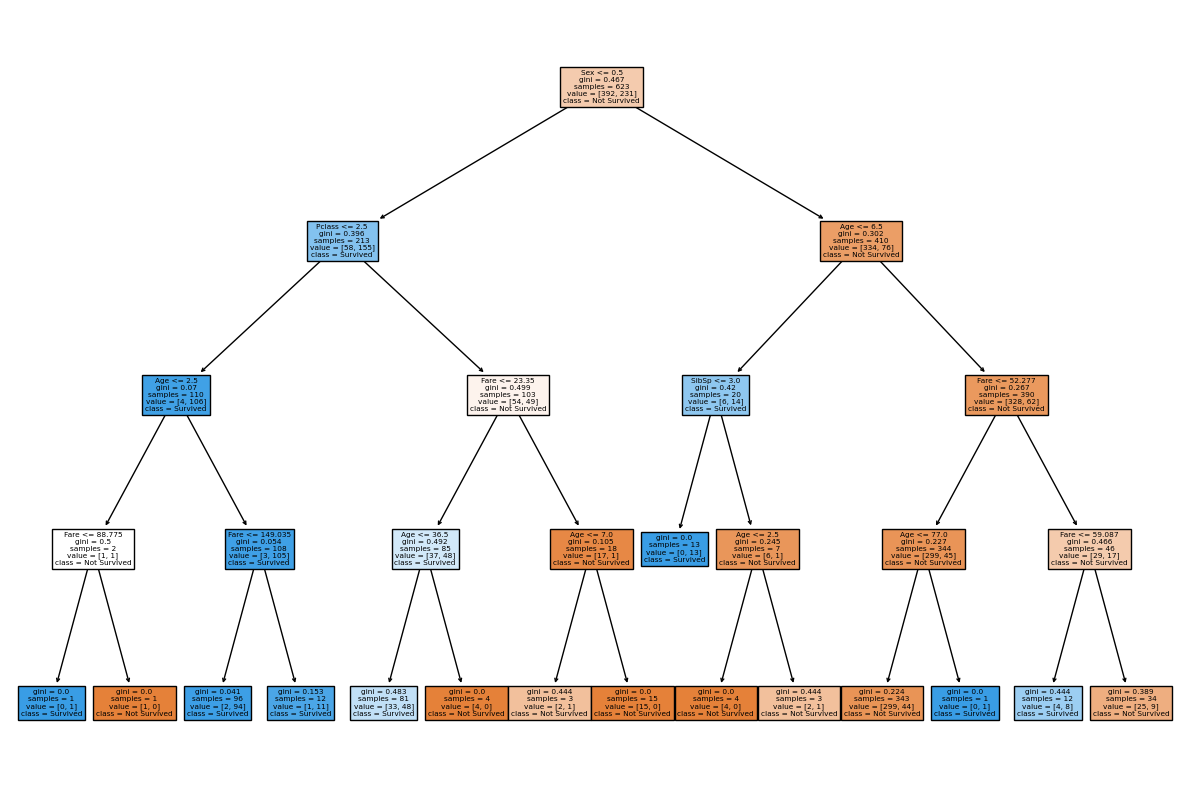

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 for female, 1 for male
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) 

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Logistic Regression:
Accuracy: 0.8097, Precision: 0.7941, Recall: 0.7297, F1-Score: 0.7606

Decision Tree:
Accuracy: 0.7388, Precision: 0.6881, Recall: 0.6757, F1-Score: 0.6818

Random Forest:
Accuracy: 0.7836, Precision: 0.7524, Recall: 0.7117, F1-Score: 0.7315



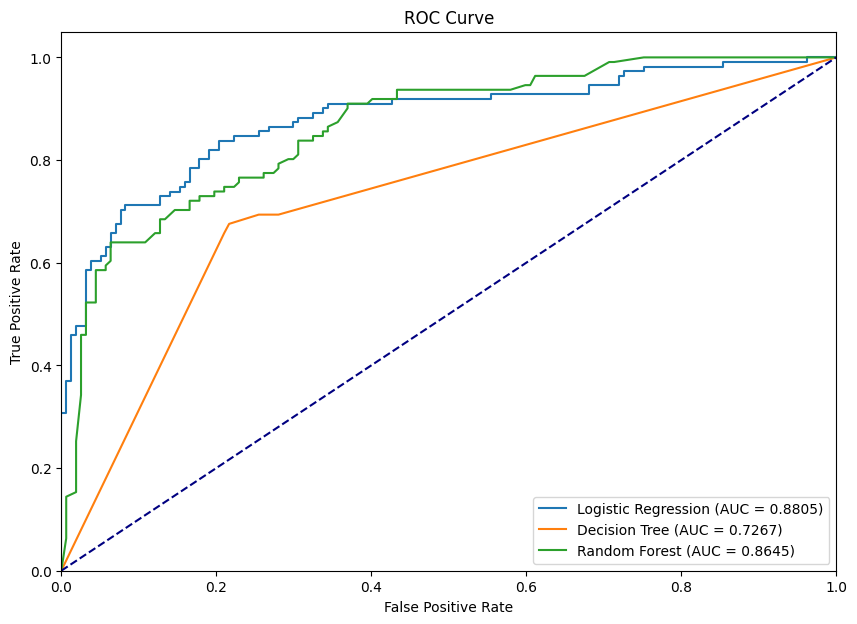

Logistic Regression 5-Fold Cross-Validation Accuracy: 0.8002 ± 0.0222
Decision Tree 5-Fold Cross-Validation Accuracy: 0.7845 ± 0.0181
Random Forest 5-Fold Cross-Validation Accuracy: 0.8148 ± 0.0141


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

classifiers = {'Logistic Regression': logreg, 'Decision Tree': dt, 'Random Forest': rf}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n')

plt.figure(figsize=(10, 7))

for name, clf in classifiers.items():
    y_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')
    print(f'{name} 5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')


Best k for Euclidean distance: 14, Accuracy: 0.8314
Best k for Manhattan distance: 17, Accuracy: 0.8314
Test accuracy for Euclidean distance: 0.8022
Test accuracy for Manhattan distance: 0.7948


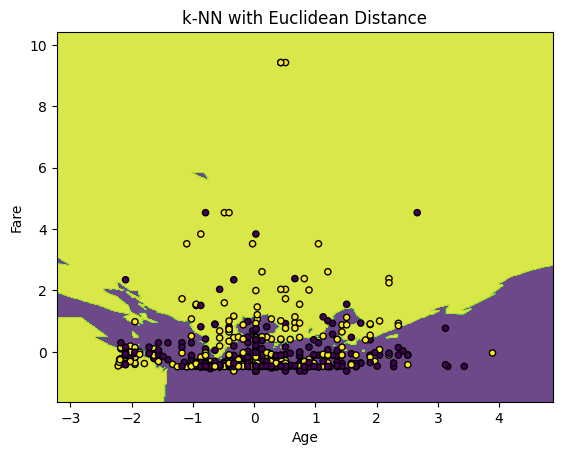

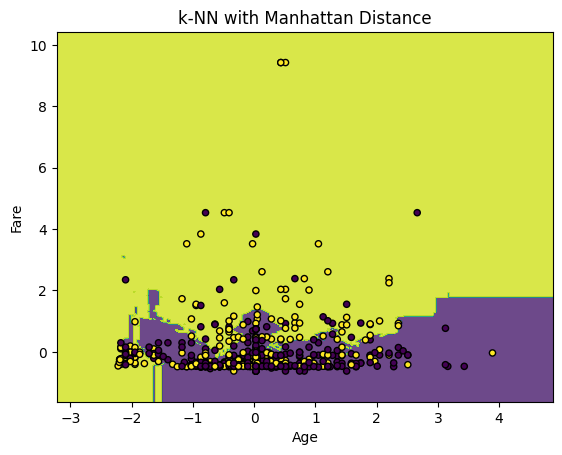

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')

param_grid = {'n_neighbors': list(range(1, 21))} 

grid_search_euclidean = GridSearchCV(knn_euclidean, param_grid, cv=5, scoring='accuracy')
grid_search_euclidean.fit(X_train_scaled, y_train)
best_k_euclidean = grid_search_euclidean.best_params_['n_neighbors']
best_acc_euclidean = grid_search_euclidean.best_score_

grid_search_manhattan = GridSearchCV(knn_manhattan, param_grid, cv=5, scoring='accuracy')
grid_search_manhattan.fit(X_train_scaled, y_train)
best_k_manhattan = grid_search_manhattan.best_params_['n_neighbors']
best_acc_manhattan = grid_search_manhattan.best_score_

print(f"Best k for Euclidean distance: {best_k_euclidean}, Accuracy: {best_acc_euclidean:.4f}")
print(f"Best k for Manhattan distance: {best_k_manhattan}, Accuracy: {best_acc_manhattan:.4f}")

knn_best_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
knn_best_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_best_euclidean.predict(X_test_scaled)
acc_test_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_best_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_best_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_best_manhattan.predict(X_test_scaled)
acc_test_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Test accuracy for Euclidean distance: {acc_test_euclidean:.4f}")
print(f"Test accuracy for Manhattan distance: {acc_test_manhattan:.4f}")

def plot_decision_boundaries(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

X_train_sub = X_train[['Age', 'Fare']].values
X_train_sub_scaled = scaler.fit_transform(X_train_sub)

knn_euclidean_sub = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
knn_euclidean_sub.fit(X_train_sub_scaled, y_train)

knn_manhattan_sub = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
knn_manhattan_sub.fit(X_train_sub_scaled, y_train)

plot_decision_boundaries(X_train_sub_scaled, y_train, knn_euclidean_sub, 'k-NN with Euclidean Distance')
plot_decision_boundaries(X_train_sub_scaled, y_train, knn_manhattan_sub, 'k-NN with Manhattan Distance')


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


nb_model = GaussianNB()

start_time = time.time()

nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
train_time_nb = time.time() - start_time

print("Naive Bayes Classifier Performance:")
print(f"Accuracy: {acc_nb:.4f}, Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}, F1-Score: {f1_nb:.4f}, Training Time: {train_time_nb:.4f}s")
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))


mlp_model = MLPClassifier(max_iter=500, random_state=42)


param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

grid_search_mlp = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
start_time = time.time()
grid_search_mlp.fit(X_train_scaled, y_train)
train_time_mlp = time.time() - start_time

best_mlp_model = grid_search_mlp.best_estimator_

y_pred_mlp = best_mlp_model.predict(X_test_scaled)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
prec_mlp = precision_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("Neural Network Classifier Performance:")
print(f"Accuracy: {acc_mlp:.4f}, Precision: {prec_mlp:.4f}, Recall: {rec_mlp:.4f}, F1-Score: {f1_mlp:.4f}, Training Time: {train_time_mlp:.4f}s")
print("\nClassification Report for Neural Network:\n", classification_report(y_test, y_pred_mlp))



print("\nComparison of Classifier Performance:")
print(f"Naive Bayes - Accuracy: {acc_nb:.4f}, Precision: {prec_nb:.4f}, Recall: {rec_nb:.4f}, F1-Score: {f1_nb:.4f}, Training Time: {train_time_nb:.4f}s")
print(f"Neural Network - Accuracy: {acc_mlp:.4f}, Precision: {prec_mlp:.4f}, Recall: {rec_mlp:.4f}, F1-Score: {f1_mlp:.4f}, Training Time: {train_time_mlp:.4f}s")


Naive Bayes Classifier Performance:
Accuracy: 0.7948, Precision: 0.7545, Recall: 0.7477, F1-Score: 0.7511, Training Time: 0.0154s

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.75      0.75      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



c:\Users\Hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Hasan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Neural Network Classifier Performance:
Accuracy: 0.8284, Precision: 0.8736, Recall: 0.6847, F1-Score: 0.7677, Training Time: 96.8389s

Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       157
           1       0.87      0.68      0.77       111

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.82       268


Comparison of Classifier Performance:
Naive Bayes - Accuracy: 0.7948, Precision: 0.7545, Recall: 0.7477, F1-Score: 0.7511, Training Time: 0.0154s
Neural Network - Accuracy: 0.8284, Precision: 0.8736, Recall: 0.6847, F1-Score: 0.7677, Training Time: 96.8389s
